In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

### Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the datasets into Pandas DataFrames.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')

Mounted at /content/drive


### Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

***Which features are available in the dataset?***

In [3]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [4]:
# preview the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# preview the data
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


***Which features contain blank, null or empty values?***

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column. 

In [6]:
# No missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<a id="ch4"></a>
## Working with Feature Data
<hr/>


In [8]:
df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

<a id="ch5"></a>
## Feature engineering
<hr/>


In [9]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


In [10]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


### Normalizing / scaling the data
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [12]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


<a id="ch7"></a>
## Creating a model


In [13]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(130,activation='relu'))

# output layer
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics = ['accuracy'])


<a id="ch8"></a>
## Training the model


In [14]:
history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=50)

Epoch 1/50
119/119 [==============================] - 2s 10ms/step - loss: 407470309376.0000 - accuracy: 0.0000e+00 - val_loss: 313756909568.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
119/119 [==============================] - 1s 9ms/step - loss: 128152076288.0000 - accuracy: 0.0000e+00 - val_loss: 99896934400.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
119/119 [==============================] - 1s 8ms/step - loss: 91005763584.0000 - accuracy: 0.0000e+00 - val_loss: 90793574400.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
119/119 [==============================] - 1s 8ms/step - loss: 82104745984.0000 - accuracy: 0.0000e+00 - val_loss: 80201637888.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
119/119 [==============================] - 1s 8ms/step - loss: 71668850688.0000 - accuracy: 0.0000e+00 - val_loss: 68472938496.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
119/119 [==============================] - 1s 8ms/step - loss: 61488201728.0000 - accuracy: 0.0000e+00 - val_loss: 58424045568.0000 - v

### Training loss per epoch
* This plot shows the training loss per epoch.
* This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time. 

            loss  accuracy      val_loss  val_accuracy
0   4.074703e+11       0.0  3.137569e+11           0.0
1   1.281521e+11       0.0  9.989693e+10           0.0
2   9.100576e+10       0.0  9.079357e+10           0.0
3   8.210475e+10       0.0  8.020164e+10           0.0
4   7.166885e+10       0.0  6.847294e+10           0.0
5   6.148820e+10       0.0  5.842405e+10           0.0
6   5.440698e+10       0.0  5.251246e+10           0.0
7   5.039599e+10       0.0  4.920763e+10           0.0
8   4.741338e+10       0.0  4.635416e+10           0.0
9   4.523197e+10       0.0  4.381423e+10           0.0
10  4.299951e+10       0.0  4.193856e+10           0.0
11  4.139605e+10       0.0  4.029346e+10           0.0
12  3.996214e+10       0.0  3.882674e+10           0.0
13  3.896085e+10       0.0  3.789358e+10           0.0
14  3.797243e+10       0.0  3.690876e+10           0.0
15  3.724003e+10       0.0  3.628390e+10           0.0
16  3.656437e+10       0.0  3.560557e+10           0.0
17  3.6104

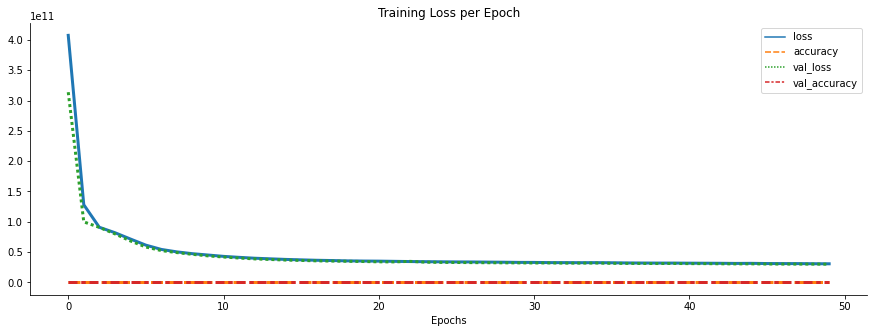

In [15]:
losses = pd.DataFrame(model.history.history)
print(losses)
plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [20]:
!pip install autokeras

import autokeras as ak


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.2 MB/s 
     |████████████████████████████████| 135 kB 55.3 MB/s 
     |████████████████████████████████| 1.6 MB 53.3 MB/s 


In [22]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
) 
data=reg.fit(
    x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=10
)

Trial 3 Complete [00h 00m 20s]
val_loss: 344952635392.0

Best val_loss So Far: 344952635392.0
Total elapsed time: 00h 01m 05s
Epoch 1/10
119/119 [==============================] - 2s 9ms/step - loss: 423613759488.0000 - mean_squared_error: 423613759488.0000 - val_loss: 432986390528.0000 - val_mean_squared_error: 432986390528.0000
Epoch 2/10
119/119 [==============================] - 1s 6ms/step - loss: 423244496896.0000 - mean_squared_error: 423244496896.0000 - val_loss: 432139862016.0000 - val_mean_squared_error: 432139862016.0000
Epoch 3/10
119/119 [==============================] - 1s 8ms/step - loss: 421648859136.0000 - mean_squared_error: 421648859136.0000 - val_loss: 429497090048.0000 - val_mean_squared_error: 429497090048.0000
Epoch 4/10
119/119 [==============================] - 1s 7ms/step - loss: 417865302016.0000 - mean_squared_error: 417865302016.0000 - val_loss: 424160428032.0000 - val_mean_squared_error: 424160428032.0000
Epoch 5/10
119/119 [==============================

**Thank you** for taking the time to read through my first exploration of a Kaggle dataset. I look forward to doing more!

If you have a question or feedback, do not hesitate to comment and if you like this kernel,<b><font color='green'> please upvote! </font></b>

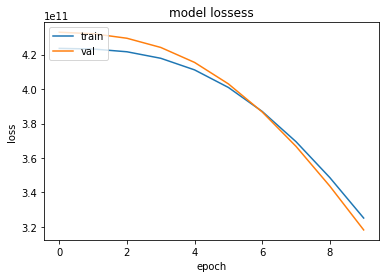

In [24]:
import matplotlib.pyplot as plt

#model_Updated.evaluate(Validation_data)
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('model lossess')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()